<a href="https://colab.research.google.com/github/ParagWadhai/Attrition-Forecast-Analysis-and-Predictions/blob/main/Data_Preprocessing_for_Delhivery_Logistics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from IPython.display import display

In [2]:
img = Image.open('/content/image.jpg')

# **Analysis of Delhivery Logistics**

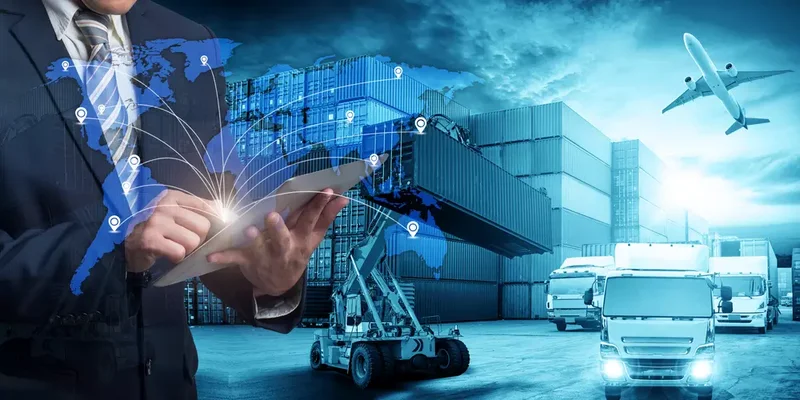

In [3]:
display(img)

**Step 1: Load the Dataset**

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/delhivery.csv')

In [6]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [7]:
df.shape

(19130, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19130 entries, 0 to 19129
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            19130 non-null  object 
 1   trip_creation_time              19130 non-null  object 
 2   route_schedule_uuid             19130 non-null  object 
 3   route_type                      19130 non-null  object 
 4   trip_uuid                       19130 non-null  object 
 5   source_center                   19130 non-null  object 
 6   source_name                     19069 non-null  object 
 7   destination_center              19129 non-null  object 
 8   destination_name                19087 non-null  object 
 9   od_start_time                   19129 non-null  object 
 10  od_end_time                     19129 non-null  object 
 11  start_scan_to_end_scan          19129 non-null  float64
 12  is_cutoff                       

**Step 2: Handle Missing Values**

In [9]:
# Identifying columns with missing values
missing_info = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_info[missing_info > 0])

Missing Values in Each Column:
source_name                       61
destination_center                 1
destination_name                  43
od_start_time                      1
od_end_time                        1
start_scan_to_end_scan             1
is_cutoff                          1
cutoff_factor                      1
cutoff_timestamp                   1
actual_distance_to_destination     1
actual_time                        1
osrm_time                          1
osrm_distance                      1
factor                             1
segment_actual_time                1
segment_osrm_time                  1
segment_osrm_distance              1
segment_factor                     1
dtype: int64


I just drop the rows where both the columns have null values and fill the missing value if one column has null value.

In [10]:
# Define the specific columns to handle
column_1 = 'source_name'
column_2 = 'destination_name'

In [11]:
#Droping rows where both columns have null values
df.dropna(subset=[column_1, column_2], how='all', inplace=True)

In [12]:
#Filling missing values in each column individually
df[column_1].fillna('missing', inplace=True)
df[column_2].fillna('missing', inplace=True)

<ipython-input-12-35660b9c56a7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_1].fillna('missing', inplace=True)
<ipython-input-12-35660b9c56a7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [13]:
# Checking the missing values again
missing_info_after = df.isnull().sum()
print("Missing Values After Handling:")
print(missing_info_after[missing_info_after > 0])

Missing Values After Handling:
destination_center                1
od_start_time                     1
od_end_time                       1
start_scan_to_end_scan            1
is_cutoff                         1
cutoff_factor                     1
cutoff_timestamp                  1
actual_distance_to_destination    1
actual_time                       1
osrm_time                         1
osrm_distance                     1
factor                            1
segment_actual_time               1
segment_osrm_time                 1
segment_osrm_distance             1
segment_factor                    1
dtype: int64


**Step 3: Correct Data Types**

In [14]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [15]:
# Defining the columns to convert to datetime
date_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']

In [16]:
# Converting each column to datetime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [17]:
# Check the data types to confirm conversion
print("Data Types After Conversion:")
print(df.dtypes)

Data Types After Conversion:
data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                 object
cutoff_factor                            float64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                  

In [18]:
#Converting a cutoff_timestamp column to datetime timestamp datatype
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'], errors='coerce')

In [19]:
# Check the data type to confirm conversion
print("Data Type After Conversion:")
print(df['cutoff_timestamp'].dtype)

Data Type After Conversion:
datetime64[ns]


In [20]:
df.head(20)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,NaT,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


After converting the cutoff_timestamp column to datetime timestamp datatype, the cutoff_timestamp column shows NAT values in some rows. So, to solve this error I used forward fill and backward fill, since the upper and lower rows shows the same dates but different timestamp.
So I extract the dates from upper and lower rows and merge with NAT values timestamp rows.

In [21]:
# Check for any NaT values (in case some dates couldn't be parsed)
nat_counts = df['cutoff_timestamp'].isna().sum()
print("Number of NaT Values After Conversion:", nat_counts)

Number of NaT Values After Conversion: 508


In [22]:
#Extracting the time part, ensuring it's done only for non-null values
df['time_part'] = df['cutoff_timestamp'].apply(lambda x: x.time() if pd.notnull(x) else None)

In [23]:
#Extracting the date part and fill missing dates
df['date_part'] = df['cutoff_timestamp'].apply(lambda x: x.date() if pd.notnull(x) else None)

In [24]:
#Forward fill and backward fill the date part
df['date_part'] = df['date_part'].fillna(method='ffill')
df['date_part'] = df['date_part'].fillna(method='bfill')

<ipython-input-24-724d88e221c4>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_part'] = df['date_part'].fillna(method='ffill')
<ipython-input-24-724d88e221c4>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_part'] = df['date_part'].fillna(method='bfill')


In [25]:
#Combining the filled date part with the original time part
# Make sure to handle rows with missing time_part (i.e., set a default time if necessary)
df['cutoff_timestamp'] = df.apply(lambda row: pd.to_datetime(str(row['date_part']) + ' ' + (str(row['time_part']) if row['time_part'] is not None else '00:00:00')), axis=1)

In [26]:
df['cutoff_timestamp']

,cutoff_timestamp
0,2018-09-20 04:27:55
1,2018-09-20 04:17:55
2,2018-09-20 00:00:00
3,2018-09-20 03:39:57
4,2018-09-20 03:33:55
...,...
19125,2018-10-04 02:12:15
19126,2018-10-04 05:22:22
19127,2018-10-04 04:02:19
19128,2018-10-04 03:42:14


In [27]:
#Droping intermediate columns
df.drop(columns=['date_part', 'time_part'], inplace=True)

In [28]:
# Checking for any remaining NaT values
nat_counts_after = df['cutoff_timestamp'].isna().sum()
print("Number of NaT Values After Filling:", nat_counts_after)

Number of NaT Values After Filling: 0


In [29]:
df.shape

(19130, 24)

In [30]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In actual_time, osrm_time, segment_actual_time, segment_osrm_time columns I found that all values present in them is integer and the columns datatype is float, so by checking all the columns I converted datatype float to integer.

In [31]:
#Checking if there are any non-integer values in the float columns
for col in ['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']:
    non_integer_values = df[~df[col].apply(float.is_integer)][col]
    print(f"Non-integer values in {col}:", non_integer_values)

Non-integer values in actual_time: 19129   NaN
Name: actual_time, dtype: float64
Non-integer values in osrm_time: 19129   NaN
Name: osrm_time, dtype: float64
Non-integer values in segment_actual_time: 19129   NaN
Name: segment_actual_time, dtype: float64
Non-integer values in segment_osrm_time: 19129   NaN
Name: segment_osrm_time, dtype: float64


In [32]:
#If no non-integer values, convert the float columns to int
df['actual_time'] = df['actual_time'].astype(int)
df['osrm_time'] = df['osrm_time'].astype(int)
df['segment_actual_time'] = df['segment_actual_time'].astype(int)
df['segment_osrm_time'] = df['segment_osrm_time'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [33]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


**Step 4: Feature Engineering**

In [34]:
# Creating Trip Duration (in hours)
df['trip_duration'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600

In [35]:
df['trip_duration']

,trip_duration
0,1.436894
1,1.436894
2,1.436894
3,1.436894
4,1.436894
...,...
19125,1.313774
19126,3.155118
19127,3.155118
19128,3.155118


Finding days of the week and the month in the start time column for analyzing the time period.

In [36]:
#Extracting Day of the Week and Month
df['day_of_week'] = df['od_start_time'].dt.day_name()
df['month'] = df['od_start_time'].dt.month

In [37]:
df[["day_of_week","month"]]

,day_of_week,month
0,Thursday,9.0
1,Thursday,9.0
2,Thursday,9.0
3,Thursday,9.0
4,Thursday,9.0
...,...,...
19125,Thursday,10.0
19126,Thursday,10.0
19127,Thursday,10.0
19128,Thursday,10.0


**Step 5: Outlier Detection and Handling**

I find the outlier in trip duration and delete that rows from the dataset.

In [38]:
# Detect outliers in trip_duration (example using IQR)
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['trip_duration'] < (Q1 - 1.5 * IQR)) | (df['trip_duration'] > (Q3 + 1.5 * IQR))

In [39]:
# Flaging outliers for further investigation
df['trip_duration_outlier'] = np.where(outlier_condition, 'Yes', 'No')

In [40]:
df['trip_duration_outlier']

,trip_duration_outlier
0,No
1,No
2,No
3,No
4,No
...,...
19125,No
19126,No
19127,No
19128,No


In [41]:
# Counting the occurrences of 'Yes' and 'No' in the 'trip_duration_outlier' column
outlier_counts = df['trip_duration_outlier'].value_counts()

# Printing the counts
print(outlier_counts)

trip_duration_outlier
No     18659
Yes      471
Name: count, dtype: int64


In [42]:
# Removing rows where 'trip_duration_outlier' is "Yes"
df = df[df['trip_duration_outlier'] == "No"].copy()

In [43]:
# Droping the 'trip_duration_outlier' column since it's no longer needed
df.drop(columns=['trip_duration_outlier'], inplace=True)

In [44]:
# Verifying the shape of the cleaned DataFrame
print("Number of rows and columns after removing outliers:", df.shape)

Number of rows and columns after removing outliers: (18659, 27)


In [45]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_duration', 'day_of_week', 'month'],
      dtype='object')

In [46]:
df.shape

(18659, 27)

**Step 6: Sanitize and Normalize Data**

In [47]:
# Standardizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [48]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [49]:
# Normalizing numeric columns (if needed)
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
df[['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_duration', 'month']] = scaler.fit_transform(df[['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_duration', 'month']])

**Step 7: Save Cleaned Data**

In [52]:
df.to_csv('cleaned_logistics_data.csv', index=False)
print("Cleaned data saved successfully.")

Cleaned data saved successfully.


In [53]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [54]:
!git config --global user.email "paragwadhai03@gmail.com"
!git config --global user.name "ParagWadhai"

In [55]:
!git clone https://github.com/ParagWadhai/Predictive-Analysis-of-Delhivery-Logistics.git

Cloning into 'Predictive-Analysis-of-Delhivery-Logistics'...
fatal: could not read Username for 'https://github.com': No such device or address


In [57]:
import shutil

In [59]:
shutil.move('Data Preprocessing for Delhivery Logistics Dataset.py', 'https://github.com/ParagWadhai/Predictive-Analysis-of-Delhivery-Logistics.git/Data Preprocessing for Delhivery Logistics Dataset.py')
shutil.move('cleaned_logistics_data.csv', 'https://github.com/ParagWadhai/Predictive-Analysis-of-Delhivery-Logistics.git/cleaned_logistics_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data Preprocessing for Delhivery Logistics Dataset.py'